## Project 2 - EDA, and ML on the books dataset + Dashboard
**Main packages:**
* Visualization: plotly, seaborn
* ML & Data analysis: sklearn, pandas, tqdm
* Dashboards: dash - dash_bootstrap_components
* Hosting: heroku, gunicorn

In [3]:
# Main imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Warnings filter in output
import warnings
warnings.filterwarnings("ignore")

# Dash for the dashboard
from dash import Dash, dcc, html, Input, Output


### 1. EDA

In [4]:
# Main dataframe
df = pd.read_csv('books.csv', on_bad_lines='skip')
df.columns = [i.replace(' ','') for i in df.columns]

df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
# No NAN data
pd.DataFrame({'nan_val':df.isna().sum(), 'dtypes':df.dtypes,'n_unique':df.nunique()}).style.background_gradient()

,nan_val,dtypes,n_unique
bookID,0,int64,11123
title,0,object,10348
authors,0,object,6639
average_rating,0,float64,209
isbn,0,object,11123
isbn13,0,int64,11123
language_code,0,object,27
num_pages,0,int64,997
ratings_count,0,int64,5294
text_reviews_count,0,int64,1822


In [6]:
px.box(x=df['num_pages'], title='Box plot based on the number of pages', labels={'x':'Number of pages'})
# Only select rows with N° of pages <= 1000

In [7]:
px.box(x=df['ratings_count'], title='Box plot based on the number of ratings', labels={'x':'Number of ratings'})
# Only select rows with N° of ratings <= 500k

In [ ]:
px.box(x=df['text_reviews_count'], title='Box plot based on the number of reviews', labels={'x':'Number of reviews'})
# Only select rows with N° of text reviews <= 5000

In [ ]:
px.histogram(df.average_rating, )

In [ ]:
px.histogram(df.num_pages, )


(Index(['bookID', 'average_rating', 'isbn13', 'num_pages', 'ratings_count',
        'text_reviews_count'],
       dtype='object'),
 <seaborn.axisgrid.JointGrid at 0x260fffa8b50>)

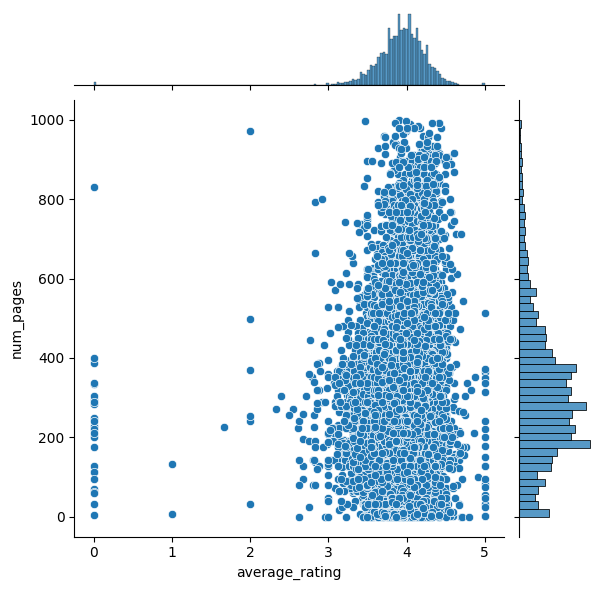

In [8]:
# Main ML dataset
df2 = df.copy().query('num_pages <= 1000 & ratings_count <= 500000 & text_reviews_count <= 5000')

df2.select_dtypes(['int','float']).columns, sns.jointplot(data=df2, x='average_rating',y='num_pages')

# df2.select_dtypes(['int','float']).corr().style.background_gradient()

### 2. Feature engineering

In [ ]:
df2

In [ ]:
# df2.drop(columns=['bookID','isbn','isbn13','publication_date','publisher']).to_csv('books_ml_data.csv', index=False)

In [ ]:
# book_encoder.fit(df2.title).transform(["鋼之鍊金術師 9"])

In [ ]:
# book_encoder.transform(["鋼之鍊金術師 9"])

In [ ]:
# df2.title.sample().iloc[0]

In [9]:
book_encoder = LabelEncoder()
author_encoder = LabelEncoder()
lge_encoder = LabelEncoder()
df2['book'] = book_encoder.fit_transform(df2.title)
df2['author'] = author_encoder.fit_transform(df2.authors)
df2['lge'] = lge_encoder.fit_transform(df2.language_code)
df2['year'] = df2['publication_date'].str[-4:].astype(int)
df2

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book,author,lge,year
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2974,2557,5,2003
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,9380,6142,4,2005
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books,8826,1434,5,2005
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books,8825,1434,5,2002
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown,7558,1434,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,2354,6376,5,2004
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,9890,6375,5,1988
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,7599,6375,5,1993
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,5259,6375,5,2007


In [15]:
author_encoder.transform(['J.K. Rowling'])

array([2557])

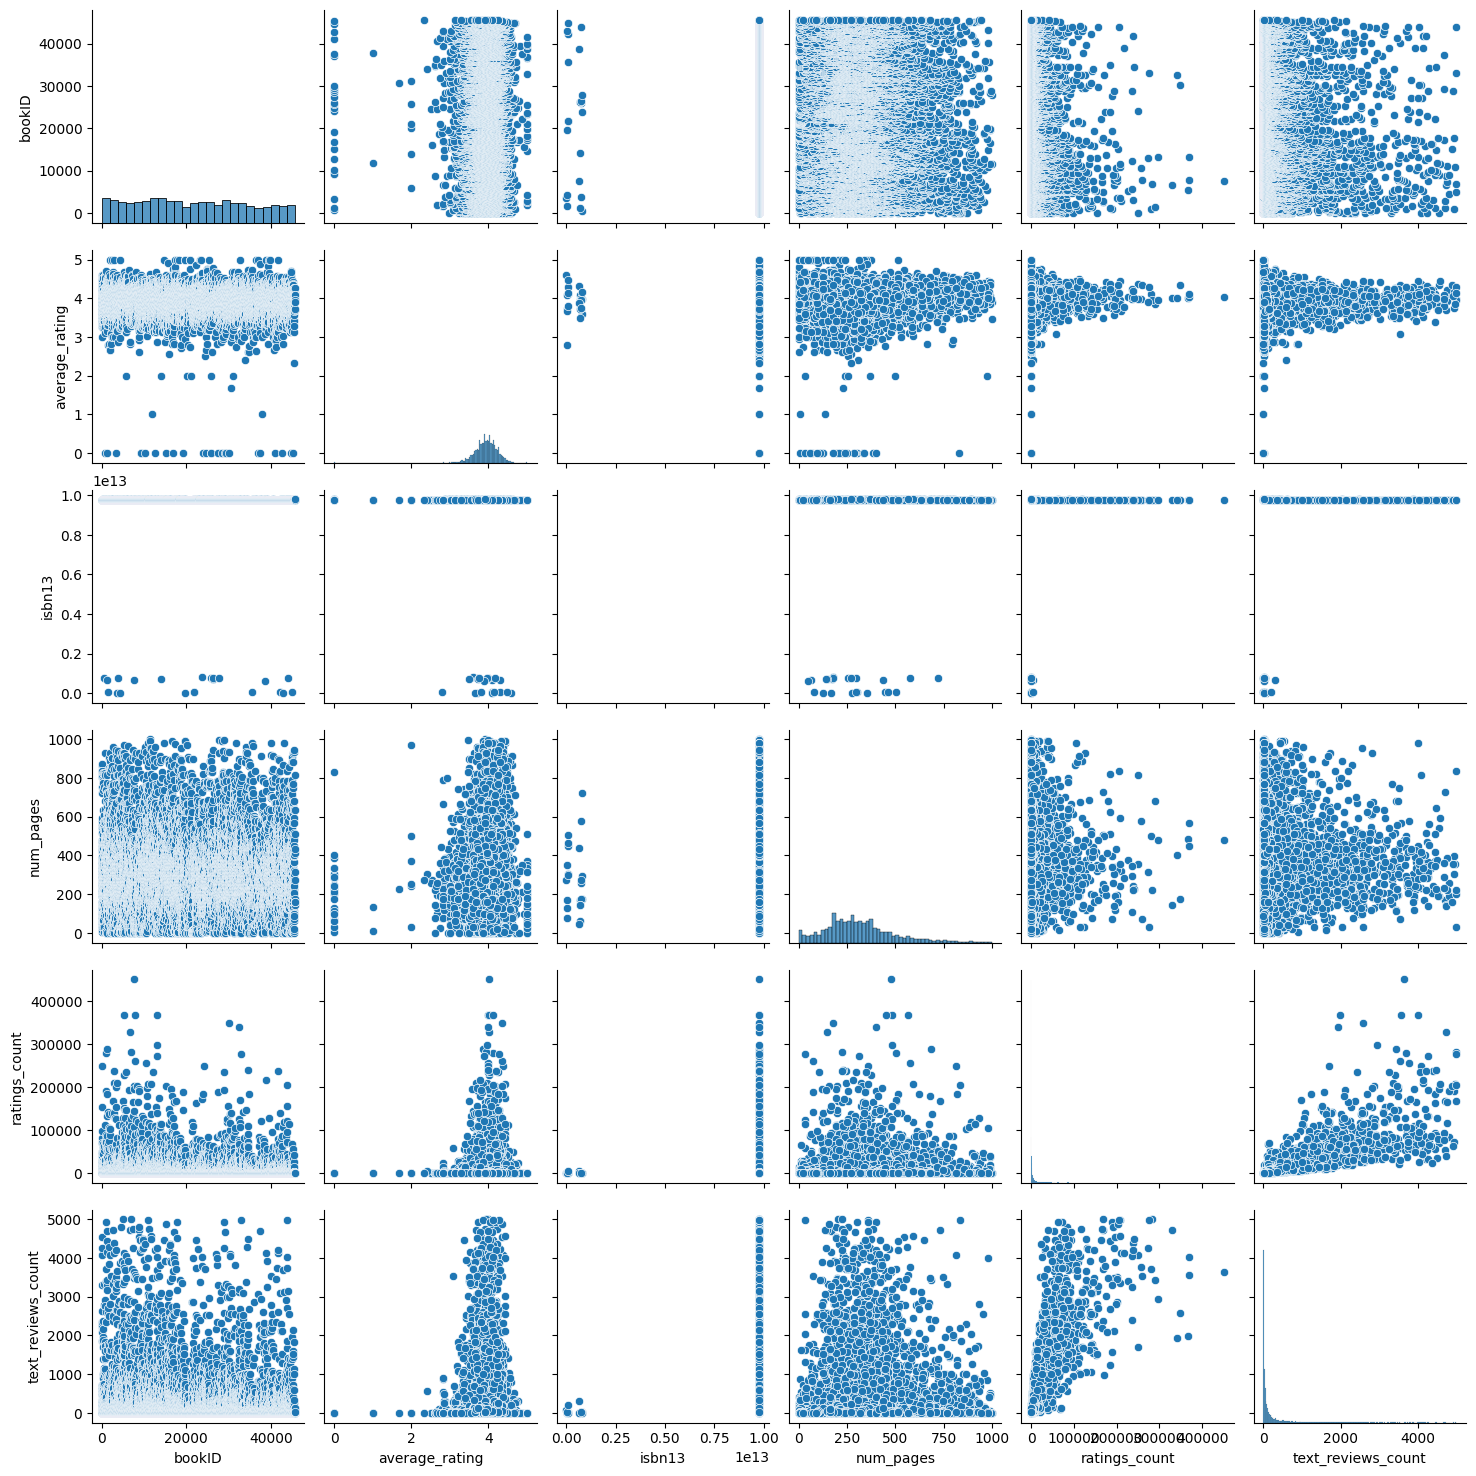

In [11]:
# It takes on average 1 to 2 minutes
sns.pairplot(df2)


### 3. Machine Learning Model

In [10]:
# x & y & train/test splitting

x, y = df2[['book', 'author', 'lge','num_pages', 'ratings_count', 'text_reviews_count', 'year']], df2.average_rating

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, test_size=.25)

In [ ]:
x_train

* #### Linear Regression model

In [35]:
from sklearn import metrics

# Model initiation and fitting
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [25]:
# Prediction
pred = lm.predict(x_test)

In [26]:
# import pickle
# filename = 'lr_model.sav'
# pickle.dump(lm, open(filename, 'wb'))

In [27]:
px.histogram(pd.DataFrame({'true':y_test, 'pred':pred}).reset_index().drop(columns='index'))

In [28]:
r2_score(y_true=y_test, y_pred=pred)

0.01617622492085158

In [44]:
# import pickle
# lr = pickle.load(open('lr_model.sav', 'rb'))
# lr.predict([x_train.iloc[99].tolist()]), y_train.iloc[99].tolist()
# lr.predict([[18,1684,5,555,555,555,1919]])

array([3.81466667])

* #### Lasso & Ridge

In [23]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100], random_state=0).fit(x_train, y_train)


print(lasso_cv.score(x_train, y_train))
print(lasso_cv.score(x_test, y_test))


0.016327305635538303
0.016104250493664374


* #### Random Forest

In [45]:
# Main models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=30, random_state=42)

rf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=30, random_state=42)

In [49]:
# Prediction
y_pred = rf.predict(x_test)
x_test

,book,author,lge,num_pages,ratings_count,text_reviews_count,year
3691,9491,5726,5,3,61,1,2005
10908,4659,1281,4,3,308,62,2001
1177,3762,1096,7,347,21,1,2000
3308,4046,769,5,408,4,0,1999
8502,8407,5912,5,552,44,5,2006
...,...,...,...,...,...,...,...
7316,7977,3768,5,560,3445,349,2010
9275,9216,3446,4,384,4209,199,1996
1677,7982,6064,4,256,461,35,2002
3918,7287,4185,5,479,15813,871,2004


In [31]:
# # Export model
# import pickle
# filename = 'rf_model.sav'
# pickle.dump(rf, open(filename, 'wb'))

In [32]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')


Mean Absolute Error: 0.22


In [33]:
rf.predict([[9491,5736,5,3,61,1,2005]])

array([4.269])

In [34]:
lge_encoder.transform(['ara'])

array([1])